<script type="text/javascript" async src="https://cdnjs.cloudflare.com/ajax/libs/mathjax/2.7.7/MathJax.js?config=TeX-MML-AM_CHTML">
</script>
<script type="text/x-mathjax-config">
 MathJax.Hub.Config({
 tex2jax: {
 inlineMath: [['$', '$'] ],
 displayMath: [ ['$$','$$'], ["\\[","\\]"] ]
 }
 });
</script>

# 線形回帰

## 線形回帰の式

$$ \hat{y} = W_0 + W_1^TX $$

## 損失関数
$$ Loss = \frac{1}{m}\sum_{i = 1}^m (y_i - \hat{y_i})^2 $$

この損失関数が最小値となる$W_1$(係数)を求める.その求める手法が$\textbf{最小二乗法}$である.  
最小二乗法を解く方法は2つある.  
- 最急降下方
- 正規方程式

最急降下法での損失関数は$L(θ_0, θ_1) = \frac{1}{m}\sum_{i = 1}^m (y_i - (θ_0 + θ_1x_i))^2 $と示す.  
最急降下法では損失関数が最小になる方向にパラメータ$θ$を動かしていき、最適解を得る手法である.  
各パラメータの更新式は以下の通りである.($α$:学習率)
- $ θ_0 := θ_0 - α\frac{\partial}{\partial θ_0}L(θ_0, θ_1) $
- $ θ_0 := θ_1 - α\frac{\partial}{\partial θ_1}L(θ_0, θ_1) $  

パラメータの数が多くなれば、上記のような式が$θ_2, θ_3$と増えていくイメージ. またこれらの式は同時に更新されていく.  
ここで、$\frac{\partial}{\partial θ_0}L(θ_0, θ_1)$や$\frac{\partial}{\partial θ_1}L(θ_0, θ_1)$について解いてみる.  
- $\frac{\partial}{\partial θ_0}L(θ_0, θ_1) = - \frac{2}{m}\sum_{i = 1}^m(y_i - (θ_0 + θ_1x_i)) = \frac{2}{m}\sum_{i = 1}^m(θ_0 + θ_1x_i - y_i)$
- $\frac{\partial}{\partial θ_1}L(θ_0, θ_1) = - \frac{2}{m}\sum_{i = 1}^m(y_i - (θ_0 + θ_1x_i))x_i = \frac{2}{m}\sum_{i = 1}^m(θ_0 + θ_1x_i - y_i)x_i$

このようにパラメータを更新していき、損失関数が最小になるところを探していくのが最急降下法である。  

次に正規方程式の解法を示す.  
正規方程式でも解くべき損失関数は同じで、$L(θ_0, θ_1) = \frac{1}{m}\sum_{i = 1}^m (y_i - (θ_0 + θ_1x_i))^2 $である.  
ただし、正規方程式では行列計算によって解く.  
予測式は$\hat{y} = θ_0 + θ_1x_{i1} + θ_2x_{i2} + ・・・ + θ_nx_{in}$と表される. (nは特徴量の数. iは各特徴量の何番目のデータかを示している添字)  
これを行列で表すと$\hat{Y} = Xθ$となる. ($\hat{Y}$はm×1の行列. $X$はm×nの行列. $θ$はn×1の行列.)  
損失関数では$L(θ) = \frac{1}{m}\sum_{i = 1}^m (Y - Xθ)^2 $となる.
この式を以下の様に解く.  
$(Y - Xθ)^2 = (Y - Xθ)^T(Y - Xθ) = (Y^T - θ^TX^T)(Y - Xθ) = Y^TY - 2θ^TX^TY + θ^TX^TXθ $  
$Y^TY - 2θ^TX^TY + θ^TX^TXθ$を$θ$で偏微分して0になるなるθが最適解となる.  
$\frac{\partial}{\partial θ}(Y^TY - 2θ^TX^TY + θ^TX^TXθ) = -2X^TY + 2X^TXθ$  
$-2X^TY + 2X^TXθ = 0$  
$\mathbf{θ = (X^TX)^{-1}X^Ty}$  

ここで正規方程式の注意点を挙げる.
- 特徴量が多すぎると$(X^TX)^{-1}$の計算に時間がかかる
- 特徴量間に強い相関があると$(X^TX)^{-1}$を求めることができない(多重共線性)
- 特徴量数がデータ数を上回る場合、回帰のパラメータを特定できない

多重共線性について説明する.  
以下のAの様に2つの特徴量に相関があるとき、$A^{-1}$を求める際の$abc$と$cba$が同じ値または近い値となるので、分母が0になってしまう.  
この点から$(X^TX)^{-1}$を求めることができなくなる.  
$A =$
$\begin{bmatrix}
   a & ba \\
   c & bc
\end{bmatrix}$
$A^{-1} =$
$\frac{1}{abc - cba}$
$\begin{bmatrix}
   bc & -ba \\
   -c & a
\end{bmatrix}$  
$A^TA =$
$\begin{bmatrix}
   a^2+c^2 & b(a^2+c^2) \\
   b(a^2+c^2) & b^2(a^2+c^2)
\end{bmatrix}$  

In [26]:
# ライブラリのインポート
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

## 単回帰

In [2]:
# データセットの読み込み
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data', header=None, sep='\s+')
df.columns=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [12]:
# 特徴量と目的変数の設定
X_train = df[['RM']].loc[:99] # 特徴量にRM（平均部屋数）を設定
y_train = df.loc[:99, 'MEDV'] # 正解値にMEDV（住宅価格）を設定
print('X_train:', X_train[:3])
print('y_train:', y_train[:3])


X_train:       RM
0  6.575
1  6.421
2  7.185
y_train: 0    24.0
1    21.6
2    34.7
Name: MEDV, dtype: float64


In [4]:
model = LinearRegression() # 線形回帰モデル
model.fit(X_train, y_train)
model.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [5]:
# モデル予測
y_pred = model.predict(X_train)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


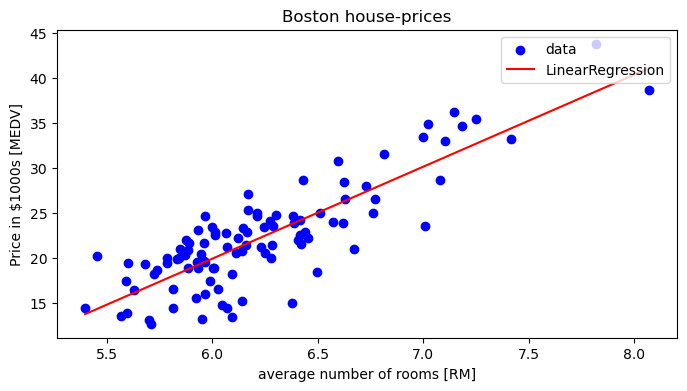

In [21]:
# データと予測値の可視化
plt.figure(figsize=(8, 4)) #プロットのサイズ指定
X = X_train.values.flatten() # numpy配列に変換し、1次元配列に変換
y = y_train.values # numpy配列に変換

# Xの最小値から最大値まで0.01刻みのX_pltを作成し、2次元配列に変換
X_plt = np.arange(X.min(), X.max(), 0.01)[:, np.newaxis] # np.newaxisで新しい次元を追加
y_pred = model.predict(X_plt) # 住宅価格を予測

# 学習データ(平均部屋数と住宅価格)の散布図と予測値のプロット
plt.scatter(X, y, color='blue', label='data')
plt.plot(X_plt, y_pred, color='red', label='LinearRegression')
plt.ylabel('Price in $1000s [MEDV]')
plt.xlabel('average number of rooms [RM]')
plt.title('Boston house-prices')
plt.legend(loc='upper right')
plt.show()

In [14]:
# パラメータ
print('傾き w1:', model.coef_[0])
print('切片 w0:', model.intercept_) 

傾き w1: 10.223463401699547
切片 w0: -41.42826246618969


## 重回帰

In [22]:
# 特徴量と目的変数の設定
X = df.drop(['MEDV'], axis=1)
y = df['MEDV']
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33


In [25]:
# 学習データとテストデータに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=0)
print('X_trainの形状：', X_train.shape, ' y_trainの形状：', y_train.shape, ' X_testの形状：', X_test.shape, ' y_testの形状：', y_test.shape)

X_trainの形状： (404, 13)  y_trainの形状： (404,)  X_testの形状： (102, 13)  y_testの形状： (102,)


In [27]:
scaler = StandardScaler() # 変換器の作成
num_cols =  X.columns[0:13] # 全て数値型の特徴量なので全て取得
scaler.fit(X_train[num_cols]) # 学習データでの標準化パラメータの計算
X_train[num_cols] = scaler.transform(X_train[num_cols]) # 学習データの変換
X_test[num_cols] = scaler.transform(X_test[num_cols]) # テストデータの変換

display(X_train.iloc[:2]) # 標準化された学習データの特徴量

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
220,-0.372574,-0.499608,-0.704925,3.664502,-0.424879,0.935678,0.693669,-0.437218,-0.162242,-0.561656,-0.484638,0.371691,-0.411000
71,-0.397099,-0.499608,-0.044878,-0.272888,-1.241859,-0.491181,-1.835528,0.730055,-0.624648,-0.573376,0.336491,0.205012,-0.387681


In [28]:
model = LinearRegression() # 線形回帰モデル
model.fit(X_train, y_train)
model.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [29]:
# テストデータの予測と評価
y_test_pred = model.predict(X_test)
print('RMSE test: %.2f' % (mean_squared_error(y_test, y_test_pred) ** 0.5))

RMSE test: 5.78


### 予測値の解釈

In [31]:
features = model.feature_names_in_.reshape(-1, 13)
coef = model.coef_
intercept = model.intercept_
result_df = pd.DataFrame({'feature': features.flatten(), 'coef': coef.flatten()})
print(f'定数項：{intercept}')
display(result_df)

定数項：22.611881188118804


,feature,coef
0,CRIM,-0.970820
1,ZN,1.057149
2,INDUS,0.038311
3,CHAS,0.594506
4,NOX,-1.855148
5,RM,2.573219
6,AGE,-0.087615
7,DIS,-2.880943
8,RAD,2.112245
9,TAX,-1.875331


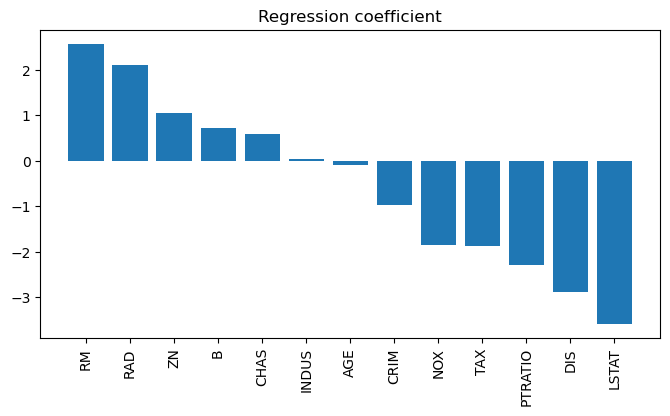

In [32]:
# 回帰係数の可視化
importances = model.coef_ # 回帰係数
indices = np.argsort(importances)[::-1] # 回帰係数を降順にソート

plt.figure(figsize=(8, 4)) #プロットのサイズ指定
plt.title('Regression coefficient') # プロットのタイトルを作成
plt.bar(range(X.shape[1]), importances[indices]) # 棒グラフを追加
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90) # X軸に特徴量の名前を追加
plt.show() # プロットを表示